best w (numpy result): [ 3.00009091  0.50009091]
min error (numpy result): 1.25115363636 

error: 15.993881818181819 | alpha: 0.010000000000000 | learning rate: 1.100000000000000
error: 11.634654638347108 | alpha: 0.010000000000000 | learning rate: 1.100000000000000
error: 5.354942739061800 | alpha: 0.009090909090909 | learning rate: 1.050000000000000
error: 1.559285772324901 | alpha: 0.008658008658009 | learning rate: 1.025000000000000
error: 1.454591832881679 | alpha: 0.008239137063886 | learning rate: 1.000000023841858
error: 1.377503983779514 | alpha: 0.008239136677152 | learning rate: 1.000000000372529
error: 1.327387527159394 | alpha: 0.008239136671109 | learning rate: 1.000000000005821
error: 1.296123132077112 | alpha: 0.008239136671015 | learning rate: 1.000000000000091
error: 1.277461274340641 | alpha: 0.008239136671013 | learning rate: 1.000000000000001
error: 1.266775440751170 | alpha: 0.008239136671013 | learning rate: 1.000000000000000
error: 1.260832231653723 | alpha: 0.0

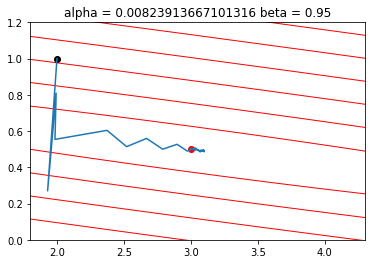

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import time
import numpy as np
from notes_utilities import pnorm_ball_line
from IPython import display

# initialize data
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
N = len(x)

# create the design matrix
A = np.vstack((np.ones(N), x)).T

# calculate values using numpy (np) 
w_best, E, rank, s = np.linalg.lstsq(A, y)

# calculate the min value using w_best
err = y-A.dot(w_best) 
E_min = np.sum(err**2) / N

print("best w (numpy result):", w_best)
print("min error (numpy result):", E_min, "\n")

def draw_pnorm():
    for i in range(0, 10):
        ln = pnorm_ball_line(mu=w_best, A = i*4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
        plt.gca().add_line(ln) 

def inspect_momentum(alpha = 0.01, beta = 0.95):
    learning_rate = 1.1
    
    # set start position for w
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = 0
   
    # set bounds for the graph
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    
    # draw start position
    plt.plot(w[0],w[1],'ko')
    
    # draw best position
    plt.plot(w_best[0],w_best[1],'ro')
    
    E_cur = 0
    # create an empty array
    W = np.zeros((2,1000))
    
    err_threshold = 0.000000000001
    
    i = 0 
    w_index = 0
    while True:
        # error
        err = y-A.dot(w)
         
        # mean square error
        E = np.sum(err**2) / N
        
        if E - E_cur > err_threshold and i != 0:
            alpha = alpha / learning_rate
            learning_rate = 1 + (learning_rate - 1) / 2
        elif E - E_cur >= 0 and E - E_cur <= err_threshold and i != 0:
            break
        else:
            W[:,w_index] = w
            w_index+=1
            E_cur = E
            print("error: %8.15f | alpha: %8.15f | learning rate: %8.15f" % (E_cur, alpha, learning_rate))
        
        
        # gradient
        dE = -2. * A.T.dot(err) / N
        p = dE + beta * p
 
        # perfom one descent step
        w = w - alpha * p
        
        i+=1
    return W, E_cur, w, w_index, i, alpha, beta, err_threshold

# run solution
draw_pnorm()
W, E, w, w_index, i , alpha, beta, err_threshold = inspect_momentum()

print()
print("best w (my method):", w)
print("min error (my method):", E, "\n")
print("iteration count for the solution:", i, " (for error threshold:" , err_threshold, ")")

# draw solution
plt.title('alpha = '+ str(alpha) + ' beta = ' +str(beta))
plt.plot(W[0,:w_index],W[1,:w_index])
plt.show()